IL Top 10 - david 

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
pd.set_option('display.max_columns',None)
import seaborn as sns
from shapely.geometry import Point, Polygon
import math
import plotly.express as px
from thefuzz import fuzz
from thefuzz import process

/opt/tljh/user/lib/python3.9/site-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
stores_2022 = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
stores_2022.drop(['Unnamed: 0'],inplace=True,axis=1)
territories = ['PR', 'FM', 'MP', 'GU', 'VI', 'MH']
stores_2022 = stores_2022.drop(stores_2022[stores_2022['STATE'].isin(territories)].index)
stores_2022.head()

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0


In [5]:
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0


In [25]:
count_top10 = grocery_sic[(grocery_sic['PARENT NUMBER']== 433922353.0)]
count_top10.tail()

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,TOP TEN,INDEPENDENT STORE,STORE TYPE
203115,QUICKCHEK,1147 SUNRISE HWY,COPIAGUE,NY,11726,1330.0,103.0,631,2,C,D,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,581208.0,RESTAURANTS,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,17.0,3815.0,2,NaN,NaN,NaN,NaN,734290402,878225705.0,433922353.0,500.0,17360500.0,H,I,NaN,NaN,6,123701.0,4.0,40.689752,-73.405989,P,35620.0,2.0,408.0,36103.0,True,False,TOP TEN
203276,MURPHY USA,505 SW 19TH ST,MOORE,OK,73160,5427.0,27.0,405,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,754201.0,CAR WASHING & POLISHING,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,5.0,1143.0,2,M,NaN,NaN,NaN,550042881,NaN,433922353.0,500.0,17360500.0,H,I,NaN,NaN,8,201604.0,2.0,35.320876,-97.492548,P,36420.0,2.0,416.0,40027.0,True,False,TOP TEN
203323,MURPHY USA,39100 NATCHEZ DR,SLIDELL,LA,70461,2142.0,103.0,985,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,2022,NaN,6.0,1233.0,2,M,NaN,NaN,NaN,256437120,NaN,433922353.0,500.0,17360500.0,H,I,NaN,NaN,7,40710.0,1.0,30.280590,-89.749725,P,35380.0,2.0,406.0,22103.0,True,False,TOP TEN
203392,MURPHY USA,2001 MURPHY,DONNA,TX,78537,1365.0,215.0,956,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,5.0,1124.0,2,M,2016.0,NaN,NaN,720780752,NaN,433922353.0,500.0,17360500.0,H,I,NaN,NaN,7,22104.0,2.0,26.187300,-98.051100,X,32580.0,2.0,365.0,48215.0,True,False,TOP TEN
203475,MURPHY USA,1805 W LINCOLN ST,HARLINGEN,TX,78552,5909.0,61.0,956,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554110.0,ALTERNATIVE FUELS,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,5.0,1171.0,2,M,NaN,NaN,NaN,592633705,NaN,433922353.0,500.0,17360500.0,H,I,NaN,NaN,7,12001.0,2.0,26.181187,-97.715393,P,15180.0,2.0,154.0,48061.0,True,False,TOP TEN


In [26]:
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)


other_row = grocery_t10_22.iloc[10:]
other_column = other_row['COUNT'].sum()


grocery_t10_22 = grocery_t10_22.iloc[:10]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22

,PARENT NUMBER,COUNT,Percent
1067,nan,77818,49.287773
78,5863311.0,11939,7.561833
585,450720289.0,6814,4.315799
81,5889993.0,4397,2.784938
92,7521503.0,3574,2.263673
574,441412723.0,2499,1.582798
84,5995907.0,2493,1.578997
263,200026573.0,2217,1.404187
281,238136725.0,2105,1.333249
843,714232249.0,1760,1.114735


In [27]:
gil=grocery_sic.query("STATE == 'IL'")
gil

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,TOP TEN,INDEPENDENT STORE,STORE TYPE
13,KROGER,301 E MCKINLEY RD,OTTAWA,IL,61350,4805.0,99.0,815,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,70.0,14158.0,2,P,NaN,NaN,NaN,152123287,NaN,7521503.0,1200.0,137888000.0,I,I,152123287.0,NaN,7,963500.0,1.0,41.323858,-88.836271,P,36837.0,1.0,176.0,17099.0,True,False,TOP TEN
86,CIRCLE K,290 MAIN ST,MARSEILLES,IL,61341,NaN,99.0,815,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,11.0,2225.0,2,F,NaN,NaN,NaN,312709629,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,5,962400.0,2.0,41.333000,-88.701000,X,36837.0,1.0,176.0,17099.0,True,False,TOP TEN
199,SPRING VALLEY SUPERMARKET,117 S SPALDING ST,SPRING VALLEY,IL,61362,2097.0,11.0,815,2,E,E,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,542107.0,MEAT-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,60.0,8908.0,9,NaN,NaN,NaN,NaN,2994101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,965200.0,2.0,41.323951,-89.199282,P,36837.0,1.0,176.0,17011.0,False,True,INDEPENDENT STORE
238,FREEDOM OIL CO,402 N MAIN ST,TOLUCA,IL,61369,9025.0,123.0,815,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,7.0,1545.0,2,NaN,NaN,NaN,NaN,308353358,NaN,452637325.0,17.0,52200.0,C,H,NaN,NaN,3,961500.0,2.0,41.005092,-89.133807,P,37900.0,2.0,0.0,17123.0,False,False,OTHER
316,SENECA FOOD MART,271 S MAIN ST,SENECA,IL,61360,9415.0,99.0,815,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,209903.0,FOOD PRODUCTS & MANUFACTURERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,8.0,1618.0,2,NaN,NaN,NaN,NaN,152142808,NaN,558247.0,75.0,1385280.0,E,K,NaN,NaN,4,963700.0,1.0,41.306622,-88.610207,P,36837.0,1.0,176.0,17099.0,False,False,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203321,AL A CARTE FOOD,2620 W CERMAK RD,CHICAGO,IL,60608,6171.0,31.0,773,2,A,B,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,2.0,512.0,9,NaN,NaN,NaN,NaN,404191958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,840700.0,3.0,41.852085,-87.691277,4,16980.0,2.0,176.0,17031.0,False,True,INDEPENDENT STORE
203333,LAKEVIEW FOODS INC,4106 N SHERIDAN RD,CHICAGO,IL,60613,2007.0,31.0,773,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1278.0,9,NaN,NaN,NaN,NaN,151164688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,32100.0,3.0,41.956971,-87.654794,P,16980.0,2.0,176.0,17031.0,False,True,INDEPENDENT STORE
203352,THORNDALE MART INC,1104 W THORNDALE AVE,CHICAGO,IL,60660,3516.0,31.0,773,2,A,A,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,2

In [28]:
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)
grocery_t10_22.reset_index(drop=True,inplace=True)
# Create other row
other_row = grocery_t10_22.iloc[11:]
other_column = other_row['COUNT'].sum()
# Remove other rows
grocery_t10_22 = grocery_t10_22.iloc[:11]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22.head(20)

,PARENT NUMBER,COUNT,Percent
0,nan,77818,49.287773
1,5863311.0,11939,7.561833
2,450720289.0,6814,4.315799
3,5889993.0,4397,2.784938
4,7521503.0,3574,2.263673
5,441412723.0,2499,1.582798
6,5995907.0,2493,1.578997
7,200026573.0,2217,1.404187
8,238136725.0,2105,1.333249
9,714232249.0,1760,1.114735


In [29]:

il = grocery_sic.loc[grocery_sic["STATE"] == 'IL']
il.loc[il["PARENT NUMBER"] == 238136725.0]



,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,TOP TEN,INDEPENDENT STORE,STORE TYPE


In [30]:
# top 10 parent companies, with amount of 

groc_il = il.groupby('PARENT NUMBER', dropna=False).count().reset_index()[['PARENT NUMBER','COMPANY']]
groc_il.sort_values('COMPANY', ascending=False, inplace=True)
groc_il.reset_index(drop=True,inplace=True)

groc_tp10_il = groc_il.iloc[:11]
other_groc = groc_il['COMPANY'].sum() - groc_tp10_il['COMPANY'].sum()

# groc_tp10_il.iloc[11, :] = {'PARENT NUMBER': 'Other', 'COMPANY': other_groc}

groc_tp10_il.loc[len(groc_tp10_il.index)] = ["Other", other_groc]
groc_tp10_il['PARENT NUMBER'] = groc_tp10_il['PARENT NUMBER'].astype(str)
groc_tp10_il.loc[:, 'Percent'] = groc_tp10_il.loc[:, 'COMPANY'] / len(il) * 100
#len(il)
groc_tp10_il.rename(columns={"COMPANY":"COUNT"})
#il.head()


/tmp/ipykernel_908477/1623083482.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groc_tp10_il.loc[len(groc_tp10_il.index)] = ["Other", other_groc]
/tmp/ipykernel_908477/1623083482.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groc_tp10_il['PARENT NUMBER'] = groc_tp10_il['PARENT NUMBER'].astype(str)
/tmp/ipykernel_908477/1623083482.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,PARENT NUMBER,COUNT,Percent
0,nan,2236,43.074552
1,441412723.0,525,10.113658
2,5863311.0,446,8.591793
3,450720289.0,329,6.337893
4,200026573.0,221,4.257369
5,5995907.0,189,3.640917
6,5889993.0,134,2.581391
7,7521503.0,122,2.350222
8,1490291.0,89,1.714506
9,723360636.0,68,1.309960


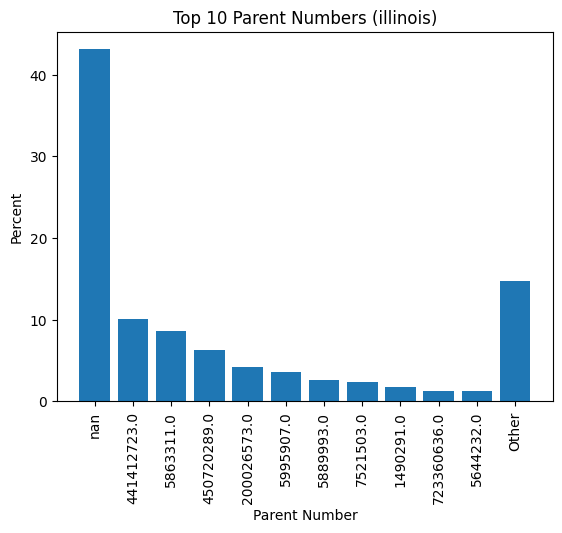

In [31]:
#top 10 parent ( Illinois) 

plt.bar(groc_tp10_il['PARENT NUMBER'], groc_tp10_il['Percent'])
plt.xlabel('Parent Number')
plt.ylabel('Percent')
plt.title('Top 10 Parent Numbers (illinois)')
plt.xticks(rotation=90)
plt.show()

In [32]:

IL_SIC1 = grocery_sic[(grocery_sic['PARENT NUMBER']== 973823321.0) & (grocery_sic['STATE'] == 'IL')]
IL_SIC1.tail()
#top 10 parent compnaies in the country 
# 1) 5863311.0 = parent company = Seven & I holdings 
# 2) 450720289.0 = parent company(s) = Alimentation Couche-Tard, Convenience Retail Asia
# 3) 5889993.0 = parent company = Walmart 
# 4) 7521503.0 = parent company = Kroger 
#5) 441412723.0 = parent company(s)= Rutters Holding Inc, CHR Corporation 
#6) 5995907.0 = parent company = Albertson, American stores 3
#7) 200026573.0 = parent company = Albrecht Discounts(aldi)
#8)  1490291.0 = parent company = Ahold Delhaize
#9) 714232249.0 = parentt company = Clark Enterprises Inc
#10) 433922353.0 = parent compnay = Murphy Oil Corporation USA 


,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,TOP TEN,INDEPENDENT STORE,STORE TYPE
100536,HOMETOWN FOOD CO,500 W MADISON ST # 3650,CHICAGO,IL,60661,4588.0,31.0,312,2,A,NaN,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,3.0,0.0,3,NaN,2018.0,NaN,NaN,738617153,738617153.0,973823321.0,8.0,3757956.0,B,K,NaN,NaN,5,280100.0,2.0,41.882364,-87.64048,P,16980.0,2.0,176.0,17031.0,False,False,OTHER


In [15]:
IL_SIC3 = grocery_sic[(grocery_sic['PARENT NUMBER']== 5995907.0) & (grocery_sic['STATE'] == 'IL')]
IL_SIC3

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
5161,JEWEL-OSCO,16 S WAUKEGAN RD,DEERFIELD,IL,60015,5216.0,31.0,847,2,E,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,546102.0,BAKERS-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,90.0,23000.0,2,M,NaN,NaN,NaN,306364910,23119.0,5995907.0,800.0,NaN,H,NaN,306364910.0,NaN,7,801500.0,1.0,42.151799,-87.837363,P,16980.0,2.0,176.0,17031.0
5279,JEWEL-OSCO,800 NORTHWEST HWY # 14,FOX RIVER GROVE,IL,60021,1208.0,111.0,847,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,591205.0,PHARMACIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,200.0,51845.0,2,M,NaN,NaN,NaN,436738993,23119.0,5995907.0,800.0,NaN,H,NaN,436738993.0,NaN,5,871402.0,3.0,42.195350,-88.209897,P,16980.0,2.0,176.0,17111.0
6579,JEWEL-OSCO,345 S RAND RD,LAKE ZURICH,IL,60047,2271.0,97.0,847,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,591205.0,PHARMACIES,609910.0,MONEY TRANSFER SERVICE,804939.0,PHARMACISTS,NaN,NaN,NaN,NaN,2022,NaN,200.0,54846.0,2,M,NaN,NaN,NaN,705479853,23119.0,5995907.0,800.0,NaN,H,NaN,705479853.0,NaN,7,864408.0,3.0,42.191712,-88.110099,P,16980.0,2.0,176.0,17097.0
6690,JEWEL-OSCO,1340 PATRIOT BLVD,GLENVIEW,IL,60026,7777.0,31.0,847,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,200.0,51110.0,2,M,NaN,NaN,NaN,700233144,23119.0,5995907.0,800.0,NaN,H,NaN,700233144.0,NaN,6,802300.0,1.0,42.078560,-87.818822,P,16980.0,2.0,176.0,17031.0
8787,JEWEL-OSCO,2203 E OAKLAND AVE,BLOOMINGTON,IL,61701,5760.0,113.0,309,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,200.0,55562.0,2,M,NaN,NaN,NaN,427996134,23119.0,5995907.0,800.0,NaN,H,NaN,427996134.0,NaN,7,5800.0,1.0,40.472303,-88.960278,P,14010.0,2.0,145.0,17113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199610,JEWEL-OSCO,370 N DESPLAINES ST,CHICAGO,IL,60661,1106.0,31.0,312,2,F,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,150.0,38333.0,2,M,NaN,NaN,NaN,643278203,23119.0,5995907.0,800.0,NaN,H,NaN,643278203.0,NaN,5,842300.0,2.0,41.888342,-87.645057,P,16980.0,2.0,176.0,17031.0
199798,JEWEL-OSCO,1763 W HOWARD ST,CHICAGO,IL,60626,1626.0,31.0,773,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,200.0,51110.0,2,M,NaN,NaN,NaN,705501147,23119.0,5995907.0,800.0,NaN,H,NaN,705501147.0,NaN,8,10202.0,1.0,42.019372,-87.675184,4,16980.0,2.0,176.0,17031.0
200464,JEWEL-OSCO,2520 N NARRAGANSETT AVE,CHICAGO,IL,60639,1041.0,31.0,773,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,200.0,51110.0,2,M,NaN,NaN,NaN,427743916,23119.0,5995907.0,800.0,NaN,H,Na

In [33]:
#FINDS IL employee size per parent company 
groc_emp_il = il.groupby('PARENT NUMBER', dropna=False).sum().reset_index()[['PARENT NUMBER','EMPLOYEE SIZE (5) - LOCATION']]
groc_emp_il.sort_values('EMPLOYEE SIZE (5) - LOCATION', ascending=False, inplace=True)
groc_emp_il.reset_index(drop=True,inplace=True)

groc_emp_il.head()

,PARENT NUMBER,EMPLOYEE SIZE (5) - LOCATION
0,5995907.0,34245.0
1,NaN,17766.0
2,7521503.0,11193.0
3,5644232.0,8702.0
4,441412723.0,6156.0


In [34]:
#FINDS IL SALES VOLUME PER PARENT COMPANY 

groc_sales_il = il.groupby('PARENT NUMBER', dropna=False).sum().reset_index()[['PARENT NUMBER','SALES VOLUME (9) - LOCATION']]
groc_sales_il.sort_values('SALES VOLUME (9) - LOCATION', ascending=False, inplace=True)
groc_sales_il.reset_index(drop=True,inplace=True)
groc_sales_il.head()

,PARENT NUMBER,SALES VOLUME (9) - LOCATION
0,5995907.0,8778935.0
1,NaN,4589479.0
2,7521503.0,2676863.0
3,5644232.0,2163275.0
4,886012012.0,1179284.0


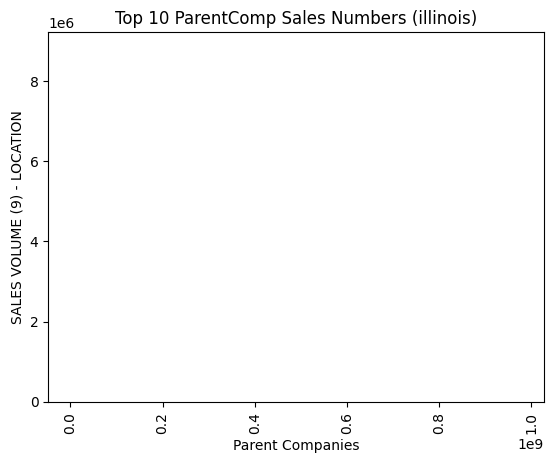

In [35]:
plt.bar(groc_sales_il['PARENT NUMBER'], groc_sales_il['SALES VOLUME (9) - LOCATION'])
plt.xlabel('Parent Companies')
plt.ylabel('SALES VOLUME (9) - LOCATION')
plt.title('Top 10 ParentComp Sales Numbers (illinois)')
plt.xticks(rotation=90)
plt.show()

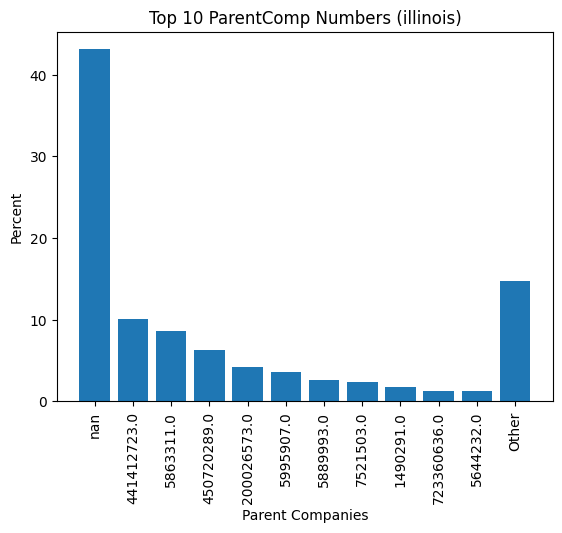

In [36]:
plt.bar(groc_tp10_il['PARENT NUMBER'], groc_tp10_il['Percent'])
plt.xlabel('Parent Companies')
plt.ylabel('Percent')
plt.title('Top 10 ParentComp Numbers (illinois)')
plt.xticks(rotation=90)
plt.show()

# parent company to illinois 
#1) 441412723.0 = parent company(s)= Rutters Holding Inc, CHR Corporation
#2) 5863311.0 = parent company = Seven & I holdings
#3) 450720289.0 = parent company(s) = Alimentation Couche-Tard, Convenience Retail Asia
#4) 200026573.0 = parent company = Albrecht Discounts(aldi)
#5) 5995907.0 = parent company = Albertson

In [37]:



grocery_sic["TOP TEN"] = grocery_sic['PARENT NUMBER'].apply(lambda x: '5863311.0' in str(x) or '450720289.0' in str(x) or '5889993.0' in str(x)or '7521503.0' in str(x)or '441412723.0' in str(x) or '5995907.0' in str(x) or '200026573.0' in str(x)or '238136725.0' in str(x)or '714232249.0' in str(x) or '433922353.0' in str(x))




grocery_sic.loc[:, "INDEPENDENT STORE"] = False
grocery_sic.loc[(grocery_sic['PARENT NUMBER'].isna()), 'INDEPENDENT STORE'] = True
grocery_sic.head()

/tmp/ipykernel_908477/2971719212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grocery_sic["TOP TEN"] = grocery_sic['PARENT NUMBER'].apply(lambda x: '5863311.0' in str(x) or '450720289.0' in str(x) or '5889993.0' in str(x)or '7521503.0' in str(x)or '441412723.0' in str(x) or '5995907.0' in str(x) or '200026573.0' in str(x)or '238136725.0' in str(x)or '714232249.0' in str(x) or '433922353.0' in str(x))


,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,TOP TEN,INDEPENDENT STORE,STORE TYPE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0,False,False,OTHER
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0,True,False,TOP TEN
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0,False,True,INDEPENDENT STORE
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0,False,True,INDEPENDENT STORE
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0,True,False,TOP TEN


In [38]:
def store_type(row):
    '''Based on the country T10 parent number's assigns each company to the group TOP TEN, INDEPENDENT STORE, or OTHER'''
    top_ten = [5863311.0, 450720289.0, 5889993.0, 7521503.0, 441412723.0, 5995907.0, 200026573.0, 238136725.0, 714232249.0, 433922353.0]
    
    parent_num = row['PARENT NUMBER']  
    
    if parent_num in top_ten:
        return 'TOP TEN'
    if math.isnan(parent_num):
        return 'INDEPENDENT STORE'
    
    return 'OTHER'

grocery_sic['STORE TYPE'] = grocery_sic.apply(store_type, axis=1)
grocery_sic.head()

/tmp/ipykernel_908477/1543423235.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grocery_sic['STORE TYPE'] = grocery_sic.apply(store_type, axis=1)


,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,TOP TEN,INDEPENDENT STORE,STORE TYPE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0,False,False,OTHER
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0,True,False,TOP TEN
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0,False,True,INDEPENDENT STORE
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0,False,True,INDEPENDENT STORE
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0,True,False,TOP TEN


In [39]:
country_independent = grocery_sic.loc[grocery_sic["STORE TYPE"] == "INDEPENDENT STORE", :]
country_independent_sorted = country_independent.sort_values(by=['EMPLOYEE SIZE (5) - LOCATION'], ascending=False)
country_independent50 = country_independent_sorted.iloc[:50, :]

In [40]:
top50 = country_independent50["COMPANY"]
top50.head()

141700                 LA RAZA MARKET
43408             AFFILIATEDFOODS INC
4854      GENUARDI'S FAMILY MARKET LP
40083                    SSP PARTNERS
170019       ZABAR'S GOURMET CATERING
Name: COMPANY, dtype: object

In [41]:
process.extract("Murphy's USA", top50, limit=10)
#citgo

[("GENUARDI'S FAMILY MARKET LP", 86, 4854),
 ("ZABAR'S GOURMET CATERING", 86, 170019),
 ("YODER'S COUNTRY MARKET", 86, 19557),
 ("SKOGEN'S FOODLINER INC", 86, 26142),
 ("WOODMAN'S FOOD MARKET INC", 86, 109228),
 ("ECKERT'S BELLEVILLE COUNTRY", 86, 24242),
 ("HEINEN'S", 86, 109334),
 ("DICK'S FRESH MARKET", 86, 183735),
 ("JERRY'S SUPERMARKETS INC", 86, 199219),
 ('GROCERY SUPPLY CO SE DIV', 43, 71574)]

## Plotting TOP 3 IN ILL

In [45]:

topthree_il = gil[(gil['PARENT NUMBER'] == 441412723.0) | (gil['PARENT NUMBER'] == 5863311.0) | (gil['PARENT NUMBER'] == 450720289.0)]


topthree_il

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,TOP TEN,INDEPENDENT STORE,STORE TYPE
86,CIRCLE K,290 MAIN ST,MARSEILLES,IL,61341,NaN,99.0,815,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,11.0,2225.0,2,F,NaN,NaN,NaN,312709629,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,5,962400.0,2.0,41.333000,-88.701000,X,36837.0,1.0,176.0,17099.0,True,False,TOP TEN
441,CASEY'S,317 S PINE ST,BUDA,IL,61314,9386.0,11.0,309,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,581222.0,PIZZA,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,7.0,2011.0,2,9,NaN,NaN,NaN,402791834,398553685.0,441412723.0,400.0,12952594.0,G,H,NaN,NaN,2,965600.0,4.0,41.323881,-89.683015,P,36837.0,1.0,176.0,17011.0,True,False,TOP TEN
590,CIRCLE K,1727 N BLOOMINGTON ST,STREATOR,IL,61364,1315.0,99.0,815,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,11.0,2023.0,2,F,NaN,NaN,NaN,211116660,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,7,963800.0,1.0,41.141578,-88.835061,P,36837.0,1.0,176.0,17099.0,True,False,TOP TEN
794,CASEY'S,1327 5TH ST,LA SALLE,IL,61301,2243.0,99.0,815,2,C,D,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,581222.0,PIZZA,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2630.0,2,9,NaN,NaN,NaN,403032444,398553685.0,441412723.0,400.0,12952594.0,G,H,NaN,NaN,6,962100.0,3.0,41.333387,-89.087419,P,36837.0,1.0,176.0,17099.0,True,False,TOP TEN
818,CASEY'S,225 N MAIN ST,SENECA,IL,61360,NaN,99.0,815,2,D,D,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,581222.0,PIZZA,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,2022,21303.0,27.0,4032.0,2,9,NaN,NaN,NaN,472944081,398553685.0,441412723.0,400.0,12952594.0,G,H,NaN,NaN,4,962400.0,3.0,41.315000,-88.602000,X,36837.0,1.0,176.0,17099.0,True,False,TOP TEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202206,CIRCLE K,5500 S PULASKI RD,CHICAGO,IL,60629,4418.0,31.0,773,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,8.0,2045.0,2,F,NaN,NaN,NaN,705232234,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,8,620300.0,1.0,41.793083,-87.723547,P,16980.0,2.0,176.0,17031.0,True,False,TOP TEN
202290,CIRCLE K,300 S DIXIE HWY,ST ANNE,IL,60964,NaN,91.0,815,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,7.0,1855.0,2,F,NaN,NaN,NaN,308350537,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,4,11100.0,1.0,41.060100,-87.745000,X,28100.0,2.0,176.0,17091.0,True,False,TOP TEN
202624,7-ELEVEN,3005 N PULASKI RD,CHICAGO,IL,60641,5444.0,31.0,773,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,581208.0,RESTAURANTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202

In [47]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column you want to retrieve unique values from is named 'column_name'
unique_sic = df['SIC'].unique()

# Print the unique values
for value in unique_values:
    print(value)
    
unique_values_list = df['column_name'].unique().tolist()


AttributeError: 'list' object has no attribute 'unique'

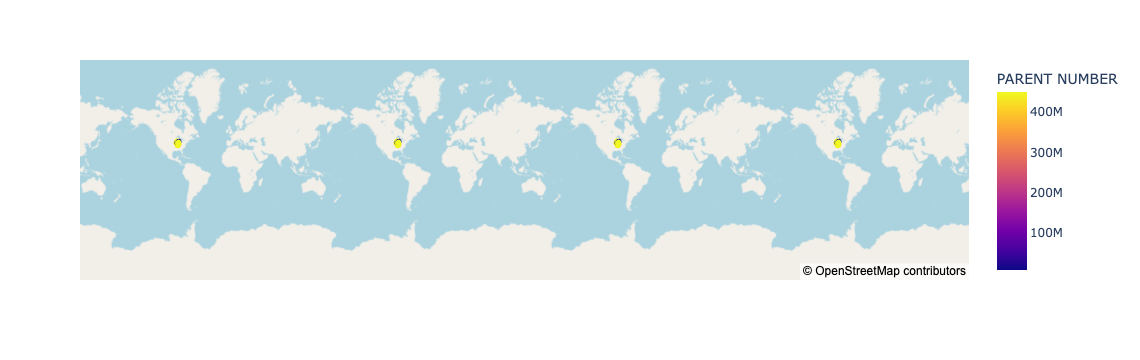

In [74]:
import plotly.express as px

# Create a scattermapbox plot
fig = px.scatter_mapbox(topthree_il, lat="LATITUDE", lon="LONGITUDE", hover_data=["COMPANY"], 
                        color="PARENT NUMBER", color_discrete_sequence=["blue", "green", "red"],
                        mapbox_style="open-street-map", zoom=5,
                       center=dict(lat=41.354, lon=-90.386))

#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_bounds={"west":-92, "east": -87, "south":37, "north":43}) #west = min long , east= mx long , north = max lat , south = min lat 
#fig.update_layout(center=dict(lat=41.354, lon=-90.386))
fig.show()

In [18]:
il = grocery_sic.loc[grocery_sic["STATE"] == 'IL']
il
groc_ind_il = il.groupby('PARENT NUMBER', dropna=False).sum().reset_index()[['PARENT NUMBER','SALES VOLUME (9) - LOCATION']]


,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
13,KROGER,301 E MCKINLEY RD,OTTAWA,IL,61350,4805.0,99.0,815,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,70.0,14158.0,2,P,NaN,NaN,NaN,152123287,NaN,7521503.0,1200.0,137888000.0,I,I,152123287.0,NaN,7,963500.0,1.0,41.323858,-88.836271,P,36837.0,1.0,176.0,17099.0
86,CIRCLE K,290 MAIN ST,MARSEILLES,IL,61341,NaN,99.0,815,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,11.0,2225.0,2,F,NaN,NaN,NaN,312709629,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,5,962400.0,2.0,41.333000,-88.701000,X,36837.0,1.0,176.0,17099.0
199,SPRING VALLEY SUPERMARKET,117 S SPALDING ST,SPRING VALLEY,IL,61362,2097.0,11.0,815,2,E,E,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,542107.0,MEAT-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,60.0,8908.0,9,NaN,NaN,NaN,NaN,2994101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,965200.0,2.0,41.323951,-89.199282,P,36837.0,1.0,176.0,17011.0
238,FREEDOM OIL CO,402 N MAIN ST,TOLUCA,IL,61369,9025.0,123.0,815,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,7.0,1545.0,2,NaN,NaN,NaN,NaN,308353358,NaN,452637325.0,17.0,52200.0,C,H,NaN,NaN,3,961500.0,2.0,41.005092,-89.133807,P,37900.0,2.0,0.0,17123.0
316,SENECA FOOD MART,271 S MAIN ST,SENECA,IL,61360,9415.0,99.0,815,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,209903.0,FOOD PRODUCTS & MANUFACTURERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,8.0,1618.0,2,NaN,NaN,NaN,NaN,152142808,NaN,558247.0,75.0,1385280.0,E,K,NaN,NaN,4,963700.0,1.0,41.306622,-88.610207,P,36837.0,1.0,176.0,17099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203321,AL A CARTE FOOD,2620 W CERMAK RD,CHICAGO,IL,60608,6171.0,31.0,773,2,A,B,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,2.0,512.0,9,NaN,NaN,NaN,NaN,404191958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,840700.0,3.0,41.852085,-87.691277,4,16980.0,2.0,176.0,17031.0
203333,LAKEVIEW FOODS INC,4106 N SHERIDAN RD,CHICAGO,IL,60613,2007.0,31.0,773,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1278.0,9,NaN,NaN,NaN,NaN,151164688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,32100.0,3.0,41.956971,-87.654794,P,16980.0,2.0,176.0,17031.0
203352,THORNDALE MART INC,1104 W THORNDALE AVE,CHICAGO,IL,60660,3516.0,31.0,773,2,A,A,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,1.0,256.0,9,NaN,NaN,NaN,NaN,427743704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,30101.0,1.0,41.990189,-87.658514,P,16980.0,2.0,176.0,17031.0
203353,SMITH & SMITH,S CHICAGO,CHICAGO,IL,60641,NaN,31.0,773,2,A,B,541

<Axes: >

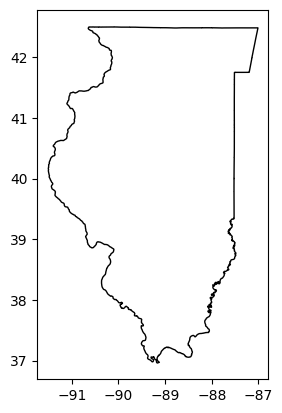

In [28]:
illinois = gpd.read_file('https://www2.census.gov/geo/tiger/TIGER2021/STATE/tl_2021_us_state.zip')
illinois = illinois[illinois['STUSPS']=="IL"]

from matplotlib import pyplot
illinois.plot(edgecolor='black', color='white')

## sic work


In [84]:
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE']].astype(str).apply(lambda x: x.str.startswith('541110','554112')).any(axis=1)]
grocery_sic.head()

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
9,WALMART GROCERY PICKUP,2460 E WABASH ST,FRANKFORT,IN,46041,9429.0,23.0,765,2,A,A,541110,GROCERY PICKUP-CURBSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,3.0,439.0,2,H,NaN,NaN,NaN,749097413,632353488.0,5889993.0,11000.0,572754000.0,K,K,492944806.0,NaN,7,950200.0,3.0,40.278905,-86.478737,P,23140.0,1.0,320.0,18023.0
36,WALMART GROCERY PKUP-DELIVERY,265 SEA ISLAND PKWY,BEAUFORT,SC,29907,1535.0,13.0,843,2,B,C,541110,GROCERY PICKUP-CURBSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1216.0,2,H,2017.0,NaN,NaN,734095701,632353488.0,5889993.0,11000.0,572754000.0,K,K,725169380.0,NaN,6,902.0,3.0,32.407458,-80.633873,P,25940.0,2.0,0.0,45013.0
37,WALMART GROCERY PKUP-DELIVERY,4400 US HIGHWAY 278,HARDEEVILLE,SC,29927,NaN,53.0,843,2,A,C,541110,GROCERY PICKUP-CURBSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,3.0,1969.0,2,H,NaN,NaN,NaN,734095766,632353488.0,5889993.0,11000.0,572754000.0,K,K,571449826.0,NaN,5,950300.0,2.0,32.267400,-81.051700,X,25940.0,2.0,0.0,45053.0
70,WALMART GROCERY PICKUP,745 N US HIGHWAY 287,LAFAYETTE,CO,80026,8955.0,13.0,303,2,D,E,541110,GROCERY PICKUP-CURBSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,22.0,6192.0,2,H,NaN,NaN,NaN,749109257,632353488.0,5889993.0,11000.0,572754000.0,K,K,316479526.0,NaN,7,12903.0,1.0,40.006065,-105.105133,P,14500.0,2.0,216.0,8013.0
109,WALMART GROCERY PKUP-DELIVERY,9354 AMBLESIDE DR,FISHERS,IN,46038,8327.0,57.0,317,2,A,A,541110,GROCERY PICKUP-CURBSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,2.0,391.0,2,H,NaN,NaN,NaN,744894942,632353488.0,5889993.0,11000.0,572754000.0,K,K,434748938.0,NaN,7,110809.0,2.0,39.981000,-86.001548,P,26900.0,2.0,294.0,18057.0


In [72]:
unique_values_list = grocery_sic['PRIMARY SIC CODE'].unique().tolist()
unique_values_list

[541103, 541105, 541110, 541107, 541108, 541106]

In [76]:
grocery_sic.shape

(157869, 53)

In [77]:
grocery_sic['NAICS8 DESCRIPTIONS'].value_counts()

NAICS8 DESCRIPTIONS
CONVENIENCE STORES                                   79099
SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS    75043
Name: count, dtype: int64

In [81]:
unkwn = grocery_sic[(grocery_sic['PRIMARY SIC CODE']== 541103)].count()
unkwn

COMPANY                         79096
ADDRESS LINE 1                  79024
CITY                            79099
STATE                           79099
ZIPCODE                         79099
ZIP4                            72113
COUNTY CODE                     79079
AREA CODE                       79099
IDCODE                          79099
LOCATION EMPLOYEE SIZE CODE     77520
LOCATION SALES VOLUME CODE      76141
PRIMARY SIC CODE                79099
SIC6_DESCRIPTIONS               79099
PRIMARY NAICS CODE              79099
NAICS8 DESCRIPTIONS             79099
SIC CODE                        53330
SIC6_DESCRIPTIONS (SIC)         53322
SIC CODE 1                      31793
SIC6_DESCRIPTIONS (SIC1)        31790
SIC CODE 2                      14351
SIC6_DESCRIPTIONS(SIC2)         14349
SIC CODE 3                       4739
SIC6_DESCRIPTIONS(SIC3)          4738
SIC CODE 4                       1359
SIC6_DESCRIPTIONS(SIC4)          1359
ARCHIVE VERSION YEAR            79099
YELLOW PAGE 

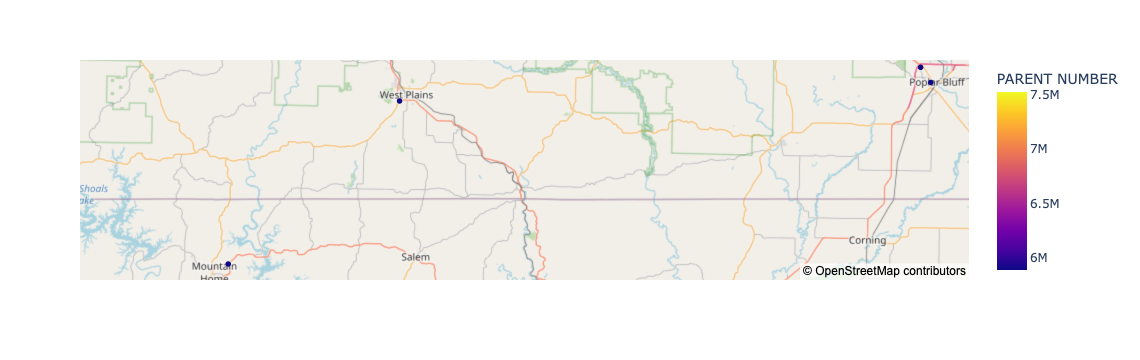

In [85]:
import plotly.express as px

# Create a scattermapbox plot
fig = px.scatter_mapbox(grocery_sic, lat="LATITUDE", lon="LONGITUDE", hover_data=["COMPANY"], color="PARENT NUMBER", color_discrete_sequence=["blue", "green", "red"], mapbox_style="open-street-map")

fig.show()